In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.optimizers import Adam

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


#### Deep Autoencoder

In [30]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1377
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0997
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0941
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0911
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0893
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0879
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0869
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0862
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0856
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0851


313/313 [==============================] - 1s 4ms/step


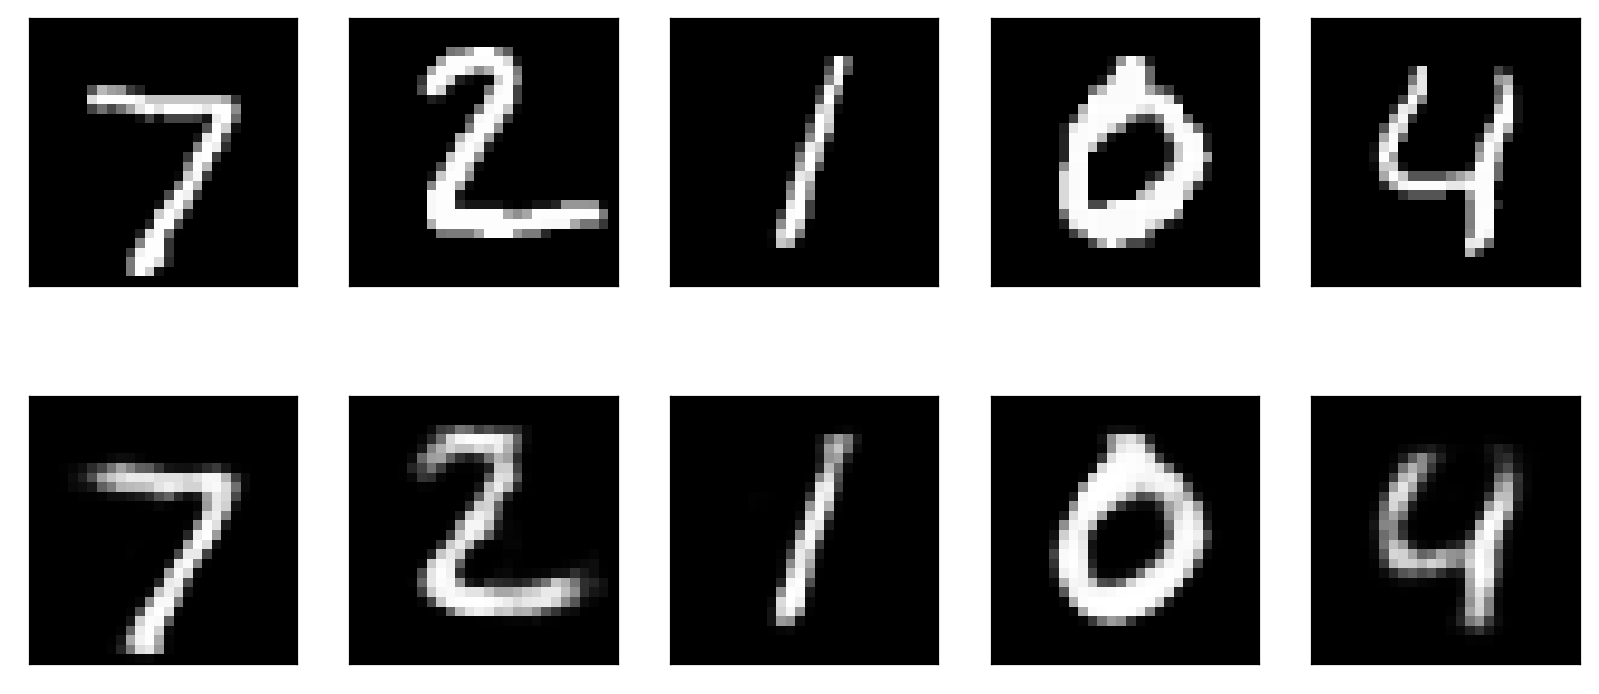

In [28]:
decoded_imgs = autoencoder.predict(x_test)

# number of example digits to show
n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(*(28, 28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot reconstruction 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(*(28, 28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Reconstructed Images')
plt.show()

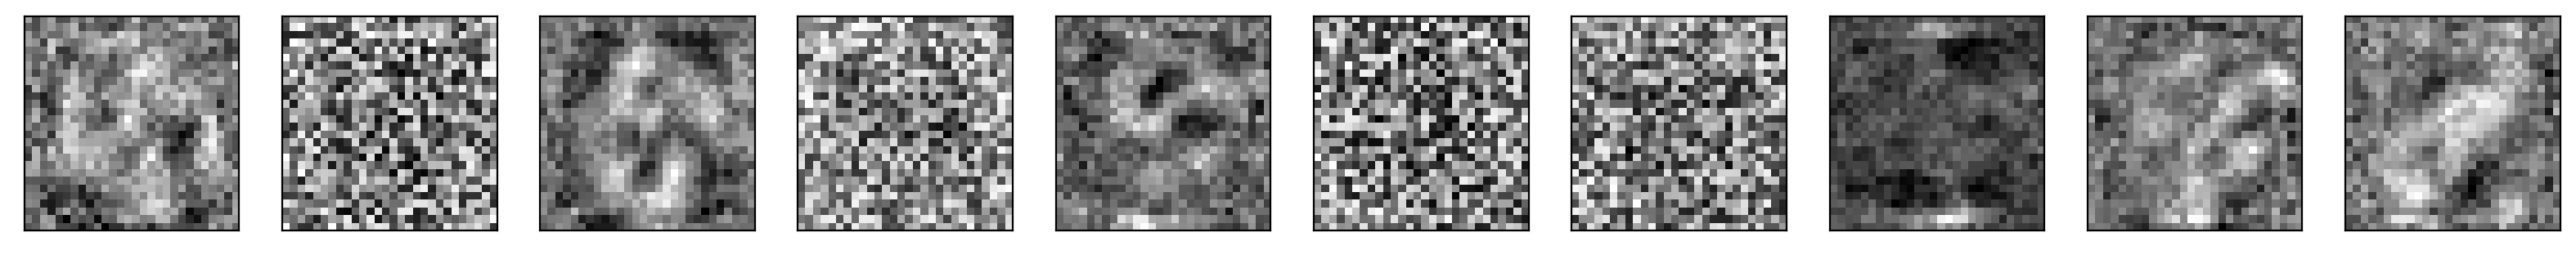

In [29]:
weights = autoencoder.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    